In [1]:
from astroquery.simbad import Simbad
import numpy as np
from PyAstronomy import pyasl
import scipy.integrate as integ
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [2]:
target_name = 'Vega'
filter_name = 'Sloanr\''

In [3]:
types = np.genfromtxt('colour-temp.txt',unpack=True,usecols=(0),dtype='str')
temps = np.genfromtxt('colour-temp.txt',unpack=True,usecols=(1))

B_zp = -20.45

In [4]:
custom_sim = Simbad()
custom_sim.add_votable_fields('flux(B)','sp')

data = custom_sim.query_object(target_name)
Bmag = data[0]['FLUX_B']
Bflux = 10**((B_zp-Bmag)/2.5)

In [5]:
filters = ['U','B','V','R','I','J','H','K']
centres = [3650,4450,5510,6580,8060,12200,16300,21900]
widths = [660,940,880,1380,1490,2130,3070,3900]
zeros = [-20.94,-20.45,-21.12,-21.61,-22.27,-23.80,-24.80,-26.00]

Order: 1 $$\chi^2$$: Power_divergenceResult(statistic=-0.0024695696780542226, pvalue=1.0)
Order: 2 $$\chi^2$$: Power_divergenceResult(statistic=-0.0022089255623637645, pvalue=1.0)
Order: 3 $$\chi^2$$: Power_divergenceResult(statistic=-0.0017644116998015002, pvalue=1.0)
Order: 4 $$\chi^2$$: Power_divergenceResult(statistic=-0.0009972762935445956, pvalue=1.0)
Order: 5 $$\chi^2$$: Power_divergenceResult(statistic=-0.0007638503409935971, pvalue=1.0)


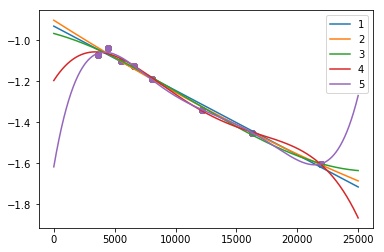

In [9]:
wave = np.arange(10e-10, 25000e-10,10e-10)

sp = str(data[0]['SP_TYPE'])[2:4]
temp_val = temps[np.where(types == sp+'V')[0][0]]
planck = pyasl.planck(temp_val,lam=wave)

max_order = 6

order = 1
while order < max_order:
    
    alphas=[]

    for i in range(0,len(filters)):
        band = np.zeros(len(wave))
        band_min = (centres[i] - widths[i]/2)*1e-10
        band_max = (centres[i] + widths[i]/2)*1e-10
        start_index = (np.abs(wave - band_min)).argmin()
        end_index = (np.abs(wave - band_max)).argmin()

        for j in range(start_index, end_index):
            band[j] = 1.0

        trans = planck*band
        flux = integ.simps(trans, wave, dx=10e-10)

        z_calc = 2.5*math.log10(flux)
        alpha = zeros[i]/z_calc
        #print(filters[i]+': '+str(alpha))
        alphas.append(alpha)
        
    
    poly = np.poly1d(np.polyfit(centres,alphas,order))
    polyplot = poly(wave*1e10)
    chivals = poly(centres)
    chisq = stats.chisquare(alphas,chivals)
    print('Order: '+str(order)+' $$\chi^2$$: '+str(chisq))
    plt.scatter(centres,alphas)
    plt.plot(wave*1e10,polyplot,label=order)
    plt.legend()
    order += 1
    
plt.show()

In [ ]:
alphas=[]

for i in range(0,len(filters)):
    band = np.zeros(len(wave))
    band_min = (centres[i] - widths[i]/2)*1e-10
    band_max = (centres[i] + widths[i]/2)*1e-10
    start_index = (np.abs(wave - band_min)).argmin()
    end_index = (np.abs(wave - band_max)).argmin()

    for j in range(start_index, end_index):
        band[j] = 1.0

    trans = planck*band
    flux = integ.simps(trans, wave, dx=10e-10)

    z_calc = 2.5*math.log10(flux)
    alpha = z_actual/z_calc
    alphas.append(alpha)
poly = np.poly1d(np.polyfit(centres,alphas,order))
print(poly)